<a id='top'></a>

# CSCI3022 F20
# Homework 7: Hypothesis Testing
***

**Name**: Nikolai Lyssogor

***

This assignment is due on Canvas by **MIDNIGHT on Monday November 23**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available under the **Data** module on Canvas, as well as in the zipped folder in which you obtained this assignment. 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Because you can technically evaluate notebook cells in a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- You **MUST** leave all of your notebook cells **evaluated** so the graders do not need to re-evaluate them. For 100+ students, this extra time adds up, and makes the graders' lives unnecessarily more difficult.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4) |
---

In [1]:
import numpy as np
import math
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

<br>

---
<a/ id='p2'></a>
[Back to top](#top)
## [25 points] Problem 1: A One-Sample Hypothesis


You are waiting for the bus, and are rather impatient.
Your friend tells you that busses arrive according to an exponential distribution with parameter $\lambda=1/10$ (busses/min) for a *mean* waiting time of 10 minutes.  You've been waiting for a while, and want to prove their hypothesis wrong: you're thinking the wait is longer than that (one-tailed).
		
(Note: You may use the approximation $e^3\approx20$ when applicable on this problem.  You may do calculations in Python if you wish, but all exposition should be in markdown.)

**Part A:** State the null and alternative hypotheses being tested.

**Solution:** 

Null hypothesis: $H_0$: The mean waiting time for the bus is 10 minutes.

Alternative hypothesis: $H_a$: The mean waiting time for the bus is significantly longer than 10 minutes. 

**Part B:** Devise a test of the form "reject if $X>c$" where $c$ is how long you have to wait until the bus arrives.  Use a significance of $\alpha= .05$.  How long do you wait before you reject the null hypothesis with a probability of type I error of 5%?


In [2]:
print(stats.norm.ppf(1-.05))

1.6448536269514722


**Solution:** We know the variance of an exponential distrubution is $\frac{1}{\lambda^2}=100$. The $z_\alpha$ score for $\alpha = .05$, one-tailed test, was computed above. To determine how long I have to wait before rejecting the null hypothesis is determined by the following equation:

$$z_\alpha = \frac{\bar x - 1/\lambda}{\sqrt{\sigma^2/n}}$$

$$\bar x = z_\alpha\sqrt{\sigma^2} + \frac{1}{\lambda}$$

$$\bar x = 26.45$$

So, for a sample size of 1, reject that the true mean is 10 minutes if $X > 26.45$. 

**Part C:** What is the power of your test if the true rate is $\lambda=1/60$?  (NB: **Power** is defined as the complement of making a Type II Error: it's the rate at which you correctly reject a false null hypothesis)


**Solution:** To solve this, we want to calculate the probability that a random bus waiting time is longer than 26.45 minutes given the average waiting time is 60 minutes. This value comes from the cumulative density function with $\lambda = 1/60$.

$$\int_{0}^{x}\frac{1}{60}e^{-x/60} = 1-e^{-x/60}$$

$$F(26.45) = 1-e^{-26.45/60} = 0.3565$$

$$1-0.3565=0.6435$$

So, the rate at which the above test will correctly reject the null hypothesis if the true mean in 60 is 64%.






**Part D:** It turns out neither the null nor alternative are correct!  The *true* distribution of busses was a continuous uniform distribution with pdf
$$f(x)=\begin{cases}
		\frac{1}{60} & 0<x<60 \, min\\
		0 & else
		\end{cases}$$
		
What is the probability that you reject the null hypothesis?  What's different about this and how we've been discussing power/Type II error rates?





**Solution:** Using the same method as in Part C, the probability that the null hypothesis is correctly rejected is 0.5592. In the real world, we can't know what the exact beta rate is for Type II errors because we wouldn't know the true mean. The acutal approach to determining beta would be a lot more guss-and-checky.

<br>

---
<a/ id='p2'></a>
[Back to top](#top)
## [25 points] Problem 2: Choosing your error levels

Ready the article at the following link: https://tinyurl.com/y6sxe9n8.

(If you have issues, log into the CU-libraries page, and search for the article "The Proposal to Lower P Value Thresholds to .005," by John P. A. Ioannidis from JAMA 2018.)


Then summarize it briefly (4-5 sentences), making sure you also answer the following: in what ways are scientists misusing p-values? Do you agree with the suggestion made in this article? What other suggestions are being made to
use them properly?


**Solution:** Scientist, as well as the general public, tend to misinterpret p-values as meaning the probability that the null hypothesis is true. The emphasis on p-values in discerning the significance of a trial leads some researchers to design their experiments around producing a low p-value. This is problematic, as p-values per se do not usually represent causality. One solution is to lower the p-value threshold to .005 in order to weed out more studies. However, due to big data, this threshold will be increasinly easy to attain, while the problem of poor experiment design persists. Another problem that may arise is the accentuated bias of interested parties. Other proposed solutions to p-values are to abandon them entirely, use different statistical methods, or focus attention on training researchers in statistics. In my opinion, for anyone interested in making a decision based on research, it's the decision maker's responsibility to make sure that the research provides sufficient evidence for the decision. Lowering the p-value threshold won't change that, but may lead to better-designed experiments. 

---

<a id='p3'></a>
[Back to top](#top)

### [25 points] Problem 3 - Some Quick Hitters

Keep your skills sharp by answering these straightforward questions.

**Part A**: <font color='green'>You're Michael Jordan in his prime...It's the sixth game of the 1998 NBA Finals and Byron Russell fouls you, but when you step up to take the freethrow, your transported to a CSCI 3022 classroom. Solve the following to "make" the freethrow:</font>

You have a shuffled deck of cards. It includes the usual 52 cards and 2 Jokers. You flip over the cards one by one, without replacing them in the deck. You count how many cards you'll have to flip until you flip four of the following five cards: the six of hearts, the eight of diamonds, the king of clubs, and both of the jokers.  You repeat this many times. 

Simulate this process at least 25000 times. Plot a histogram with binsize=1 of the outcomes, in lightgrey with white outline. Compute the mean, median, and mode for this dataset, indicate them on the plot using a line, with linstyles of green dashed, red dotted, and black solid, respectively. Use a legend to label your histogram (of the distribution of flips), mean, median. Does this data look positively or negatively skewed? Explain below in a markdown cell, talk about the mean, median, and the shape of the histogram in your answer.

In [67]:
def flip_cards(deck):
    draws = np.random.choice(deck, 53, replace=False)
    successes = 0
    i = 0

    while(successes < 4):
        if(draws[i] == 5 or draws[i] == 20 or draws[i] == 38 or draws[i] == 52 or draws[i] == 53):
            successes += 1
        i+=1 
            
    return i
    
# hearts: 0-12
# diamonds: 13-25
# clubs: 26-38
# spades: 39-51
# jokers: 52,53
deck = np.array([i for i in range(0, 54)])
sim = np.array([flip_cards(deck) for i in range(25000)])

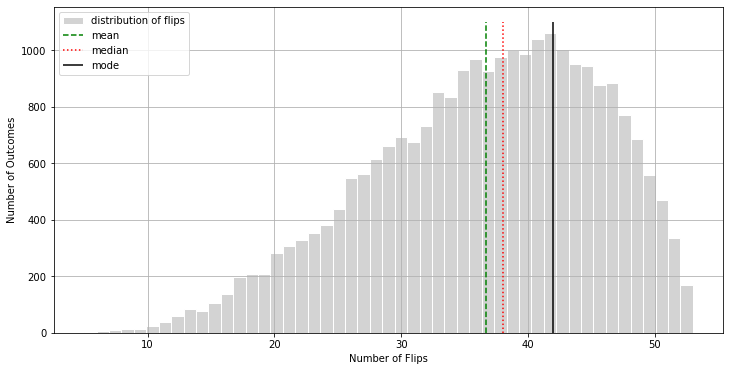

In [90]:
mode = stats.mode(sim)

fig, ax = plt.subplots(figsize=(12, 6))
pd.Series(sim).hist(ax=ax, bins=49, color="lightgrey", edgecolor="white", label="distribution of flips")
plt.vlines(np.mean(sim), ymin=0, ymax=1100, color="green", linestyle="dashed", label="mean")
plt.vlines(np.median(sim), ymin=0, ymax=1100, color="red", linestyle="dotted", label="median")
plt.vlines(mode[0][0], ymin=0, ymax=1100, color="black", linestyle="solid", label="mode")
ax.set_xlabel("Number of Flips")
ax.set_ylabel("Number of Outcomes")
ax.legend(loc='upper left')

The data above looks negatively skewed. This makes sense, since the mean is less than the median. Put another way, because the point that divides the dataset in half is greater than the average of the data, the data to the left of the median should take up more bins than the data to the right of it. 

***

**Part B**: <font color='green'> Now you're back up for another freethrow, but this time you've been transported to the third overtime of the famous [1976 NBA Finals Game Five](https://www.youtube.com/watch?v=3ZjNDvuMxzc). You line up for a freethrow, but oddly enough you're again transported back to CSCI 3022... Why does this keep happening? If you solve this problem, you make the freethrow:</font>

In general, which is wider: a 95% confidence interval or a 99% confidence interval? How would you explain this to your younger sibling, who is not a statistician?

**Solution:** A 99% confidence interval is generally wider. A confidence interval is a range, centered at the mean of the sampled data, in which the true mean will lie 99% of the times we run our experiment. Lower percentage confidence intervals are smaller, meaning you get a more precise idea of where the true mean is, but the likelihood that the interval covers the true mean is reduced. 

***

**Part C**: <font color='green'>The crowd is silent... Because there is no crowd... And it's not a basketball game...  You're Will Smith and it's 1998. You've got an important decision to make: You've been offered the lead role in both a sci-fi flick and a steampunk western action comedy. If you make this "freethrow", Will Smith takes the sci-fi role and stars in "The Matrix" as Neo. If you fail to solve this question, Will Smith makes the blunder of turning down the "Matrix" to appear in "Wild Wild West" and history remains unchanged.
</font>

Let $X$ be a normally-distributed random variable. You draw from it and get these values, stored in the numpy array **smith**, below. These represent the probabilities of him taking the role in the matrix, calculated by different "statistical measures". Compute a 95% confidence interval for the _mean_.


In [104]:
smith = np.array([0.67832,0.113,0.423,0.279,0.580,0.401,0.189, 0.198, 0.147, 0.103, 0.098])
xbar = np.mean(smith)
sigma = np.sqrt(np.var(smith))
n = len(smith)
t_alpha = stats.t.ppf(.95, 10)
lower_bound = xbar - (t_alpha*sigma) / np.sqrt(n)
upper_bound = xbar + (t_alpha*sigma) / np.sqrt(n)
print("The 95%% CI for the mean, from a t-test is: [%.2f, %.2f] " % (lower_bound, upper_bound))

The 95% CI for the mean, from a t-test is: [0.19, 0.40] 


The confidence interval is wide relative to the range of the sample data because the number of samples is small. 


***

**Part D**: <font color='green'>Now we're back to basketball...You're Askia Booker, former CU point guard. It's the [2013 KU game](https://www.youtube.com/watch?v=-ycTB27RlEc) and your take the ball with 2.7 seconds left. To sink the three and win the game, solve the following: </font>

If you're doing quality control for the average strength of carbon fiber that will be used in airplane construction, and your alternative hypothesis is that the strength of the carbon is below tolerance, and therefore unsafe, would you rather have a low Type I error rate or a low Type II error rate? Explain.


**Solution:** You would rather have a low Type II error rate. A Type II error in this case means that we don't reject the null hypothesis that current stregnth of the carbon is of satisfactory tolerance, when really it is below tolerance. This would lead to flying with unsafe carbon while thinking that it is up to standards.  


***

**Part E**: <font color='green'>Well, we haven't stopped time traveling yet.... But now we're in the soccer world. Your a striker in the [1994 Fifa World Cup Final](https://www.youtube.com/watch?v=pLPM_JSbGvI) between Brazil and Italy. Solve this problem to make a penalty kick during the final shootout:</font>

You measure 49 suckers from baby reef octopuses and find that they are, on average, 47.2 mm wide, with a standard devaition of 29.2mm. 

Then you measure 65 suckers from from baby dumbo octopuses and find that they are, on average, 63.9 mm wide, with a standard deviation of 19.6 mm. 

Is there statistical evidence at the 0.025 significance level that the true mean of baby dumbo octopus sucker width exceeds the true mean of baby reef octopus sucker width by more than 7 mm?  Use a test of your choice.

**Solution:** We can solve this using hypothesis testing. Our null hypothesis is $H_0$: the mean sucker width of baby dumbo octopuses does not exceed the mean sucker width of baby reef octopuses by more than 7 mm. The alternative hypothesis is $H_a$: the mean sucker width of baby dumbo octopuses does exceed the mean sucker width of baby reef octopuses by more than 7 mm. 

---

<a id='p4'></a>
[Back to top](#top)

### [25 points] Problem 4 - Maybe we actually do some tests now?


It is estimated that [about 75% of adults](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4997286/) in the United States drink coffee. Often, coffee is used to replace the need for sleep. It works alright, or so we think. Let's find out, in this exciting homework problem!

[One recent study](https://www.sciencedirect.com/science/article/pii/S1388245703002554) investigated the effects of drinking coffee, taking a nap, and having a ["coffee-nap"](https://lifehacker.com/naps-vs-coffee-which-is-better-when-youre-exhausted-1730643671) - the practice of drinking some coffee *and then* having a short nap. The study broke participants up into three groups of 15 participants each, where the groups would have a nap, or have a coffee, or have a coffee-nap, then perform a task where their reaction time was measured. In previous experiments the mean reaction time measurement was found to be normally distributed. The reaction time means (milliseconds, ms) and standard deviations for the three groups of participants are given in the table below.

$$
\begin{array}{c|c|c|c}
\textrm{Group} & \textrm{Sample Size} & \textrm{Mean} & \textrm{Standard Deviation} \\
\hline 
\textrm{Coffee+Nap} & 15 & 451.3 & 31.9 \\ 
\textrm{Coffee} & 15 & 494.2 & 39.6 \\ 
\textrm{Nap} & 15 & 492.8 & 45.2 \\ 
\end{array}
$$

**Part A**: Compute a 97.5% t-confidence interval for the mean reaction time measurement for participants in each of these three groups. (You should find three separate confidence intervals.) Report the results.

1. Can you make any conclusions regarding whether coffee, naps or both (coffee-naps) are better for faster reaction times?
2. Why did we use a t-distribution?

**Part B**: Use an appropriate hypothesis test to determine if there sufficient evidence, at the $\alpha = 0.025$ significance level, to conclude that taking a nap promotes faster reaction time than drinking coffee.  Be sure to clearly explain the test that you're doing and state all hypotheses. Do all computations in Python, and report results.

**Part C**: Use an appropriate hypothesis test to determine if there is sufficient evidence, at the $\alpha = 0.025$ significance level, to conclude that taking a coffee-nap promotes faster reaction time than only drinking coffee, or only having a nap.  Be sure to clearly explain the test that you're doing and state all hypotheses. Do all computations in Python, and report results.

In [ ]:
# coffee-nap versus coffee

In [ ]:
# coffee-nap versus nap

**Part D**: Compute a 97.5% confidence interval for the standard deviation of reaction time for coffee-nap takers. Do all computations in Python, and report the results.